In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('job_placement_Data_Enhanced.csv')

In [4]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3,98,1,0,94,Mid,Medium
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4,88,1,1,54,MNC,Low
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2,41,1,1,82,Startup,Low
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,4,41,0,0,50,MNC,High
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,4,67,0,0,67,Mid,High


In [5]:
df.shape

(215, 20)

In [6]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status', 'years_experience', 'skills_match_percent',
       'num_certifications', 'internship_completed', 'interview_score',
       'company_tier', 'job_competition_level'],
      dtype='object')

In [8]:
df.dtypes

gender                    object
ssc_percentage           float64
ssc_board                 object
hsc_percentage           float64
hsc_board                 object
hsc_subject               object
degree_percentage        float64
undergrad_degree          object
work_experience           object
emp_test_percentage      float64
specialisation            object
mba_percent              float64
status                    object
years_experience           int64
skills_match_percent       int64
num_certifications         int64
internship_completed       int64
interview_score            int64
company_tier              object
job_competition_level     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 215 non-null    object 
 1   ssc_percentage         215 non-null    float64
 2   ssc_board              215 non-null    object 
 3   hsc_percentage         215 non-null    float64
 4   hsc_board              215 non-null    object 
 5   hsc_subject            215 non-null    object 
 6   degree_percentage      215 non-null    float64
 7   undergrad_degree       215 non-null    object 
 8   work_experience        215 non-null    object 
 9   emp_test_percentage    215 non-null    float64
 10  specialisation         215 non-null    object 
 11  mba_percent            215 non-null    float64
 12  status                 215 non-null    object 
 13  years_experience       215 non-null    int64  
 14  skills_match_percent   215 non-null    int64  
 15  num_ce

In [10]:
df.isnull().sum()

gender                   0
ssc_percentage           0
ssc_board                0
hsc_percentage           0
hsc_board                0
hsc_subject              0
degree_percentage        0
undergrad_degree         0
work_experience          0
emp_test_percentage      0
specialisation           0
mba_percent              0
status                   0
years_experience         0
skills_match_percent     0
num_certifications       0
internship_completed     0
interview_score          0
company_tier             0
job_competition_level    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,2.483721,70.413953,2.423256,0.483721,74.046512
std,10.827205,10.897509,7.358743,13.275956,5.833385,1.701694,17.235065,1.708259,0.500901,14.602447
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,40.000000,0.000000,0.000000,50.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,1.000000,58.000000,1.000000,0.000000,62.500000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,3.000000,71.000000,3.000000,0.000000,74.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,4.000000,86.000000,4.000000,1.000000,86.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,5.000000,99.000000,5.000000,1.000000,99.000000


In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

C:\Users\MAYANI\AppData\Local\Temp\ipykernel_9080\3088171060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'status', palette = 'Set2')


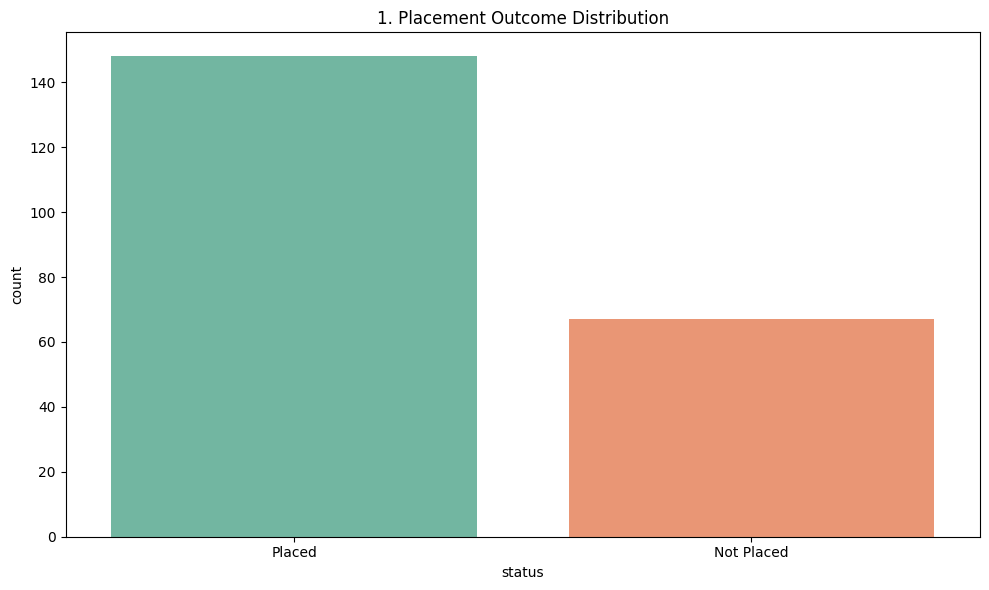

C:\Users\MAYANI\AppData\Local\Temp\ipykernel_9080\3088171060.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'status', y = 'mba_percent',palette='coolwarm')


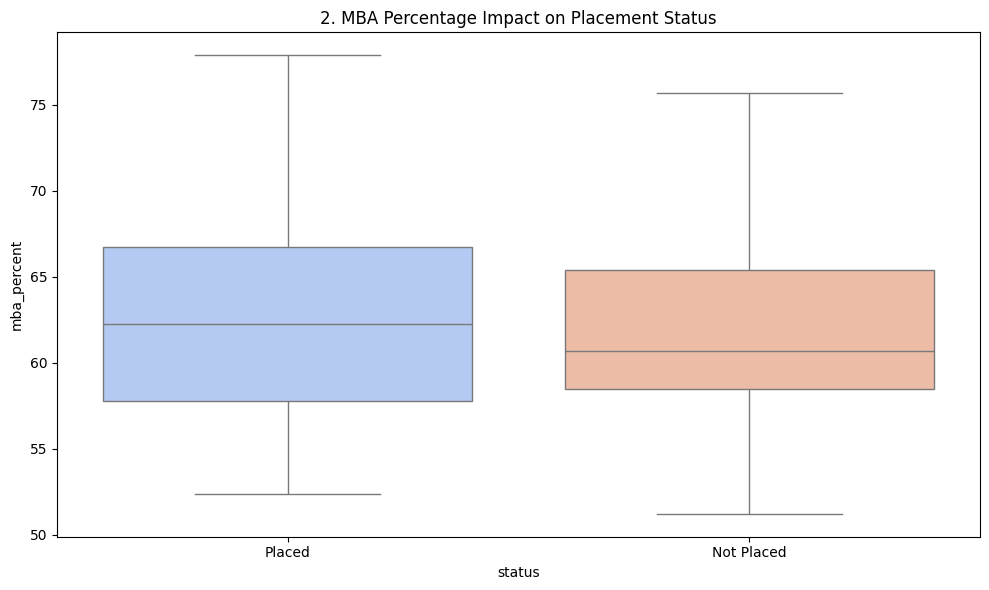

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'status', palette = 'Set2')
plt.title(f'{plot_no}. Placement Outcome Distribution')
show_fig()
plot_no += 1
fig = plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'status', y = 'mba_percent',palette='coolwarm')
plt.title(f'{plot_no}. MBA Percentage Impact on Placement Status')
show_fig()
plot_no += 1

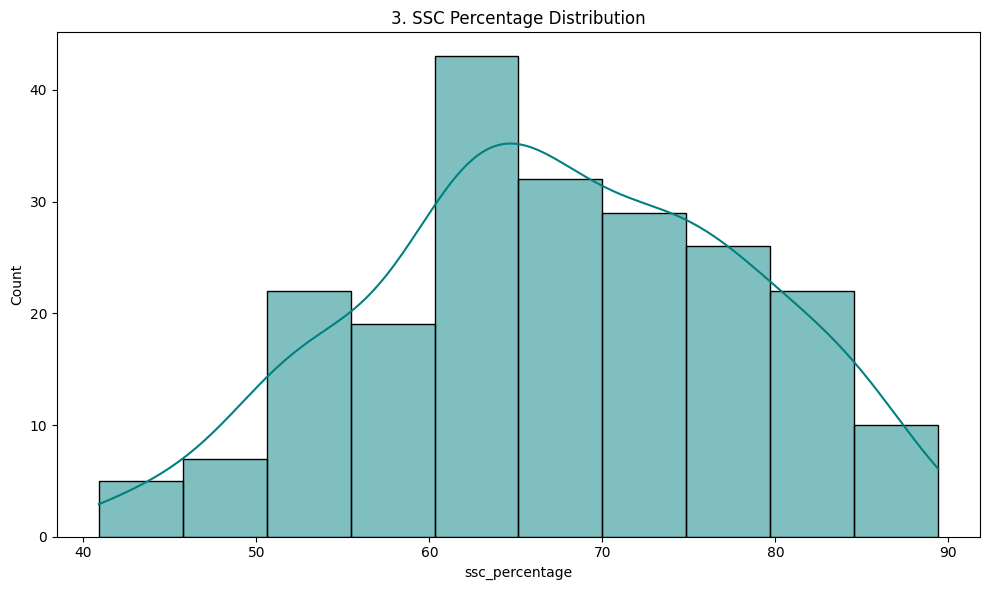

In [17]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df["ssc_percentage"],kde = True,color = 'teal')
plt.title(f'{plot_no}. SSC Percentage Distribution')
show_fig()
plot_no += 1

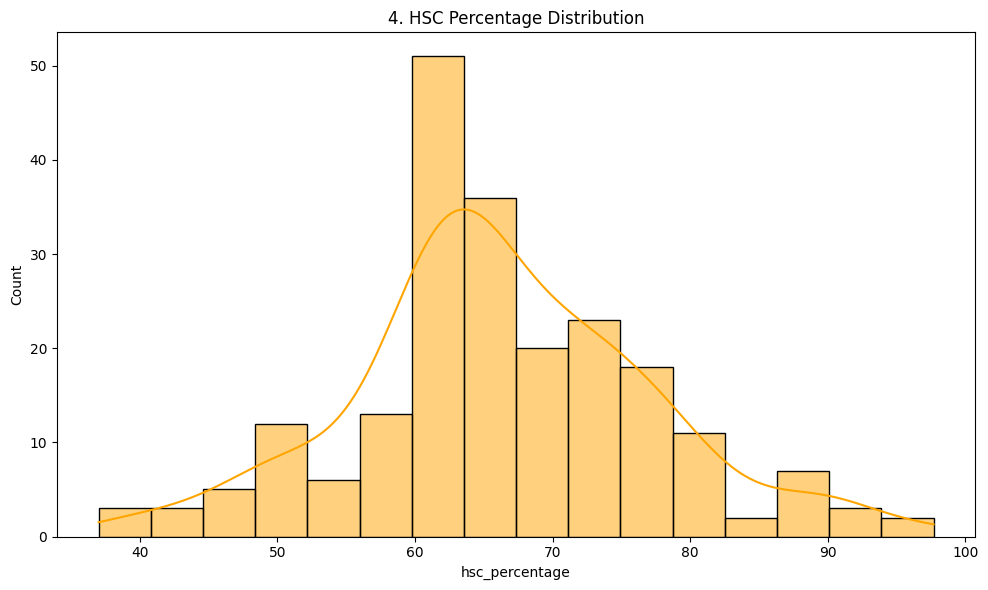

In [18]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['hsc_percentage'], kde = True, color = 'orange')
plt.title(f'{plot_no}. HSC Percentage Distribution')
show_fig()
plot_no += 1

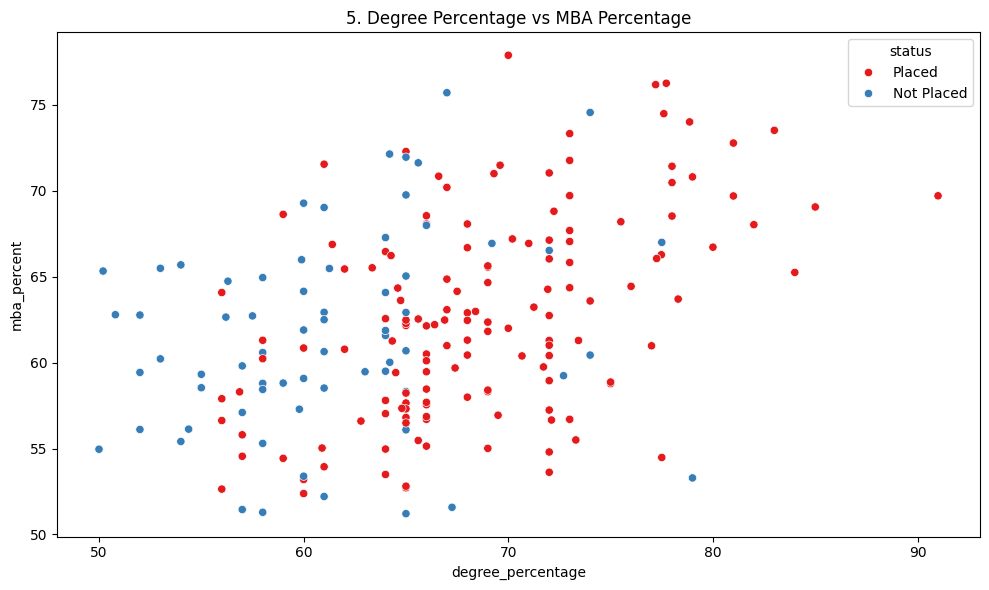

In [ ]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='degree_percentage', y = 'mba_percent',hue='status', palette='Set1')
plt.title(f'{plot_no}. Degree Percentage vs MBA Percentage by Placement')
show_fig()
plot_no += 1

C:\Users\MAYANI\AppData\Local\Temp\ipykernel_9080\672028744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'gender', y = 'mba_percent', palette = 'Set3')


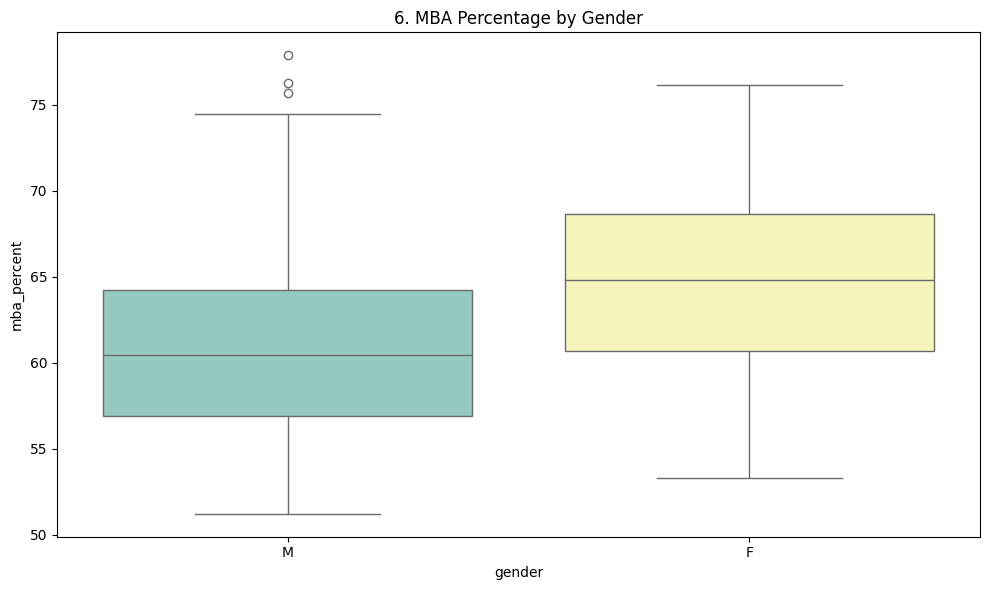

In [20]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'gender', y = 'mba_percent', palette = 'Set3')
plt.title(f'{plot_no}. MBA Percentage by Gender')
show_fig()
plot_no += 1

C:\Users\MAYANI\AppData\Local\Temp\ipykernel_9080\1947068444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="work_experience", y="emp_test_percentage", palette="muted")


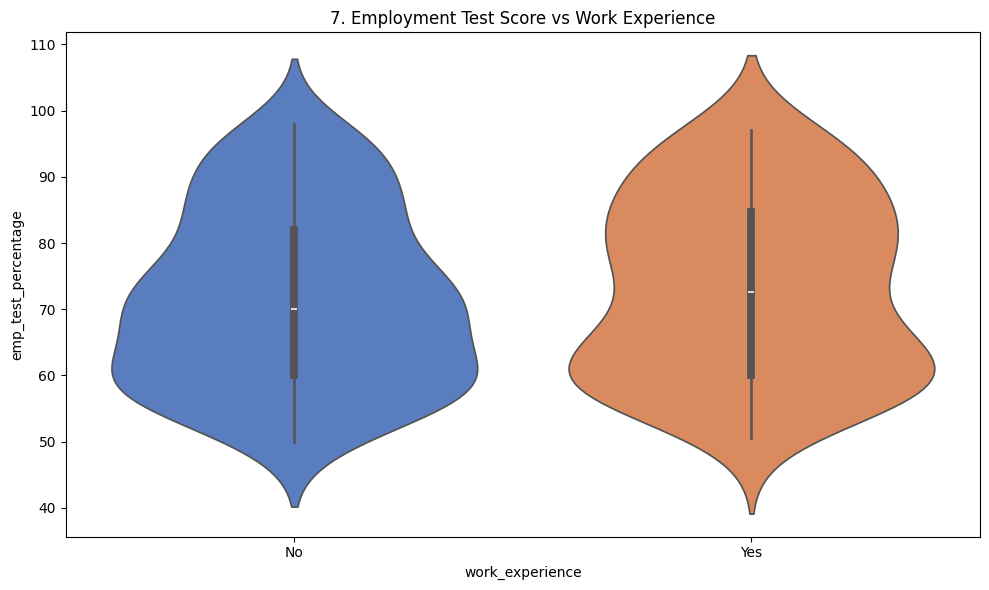

In [21]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="work_experience", y="emp_test_percentage", palette="muted")
plt.title(f'{plot_no}. Employment Test Score vs Work Experience')
show_fig()
plot_no += 1

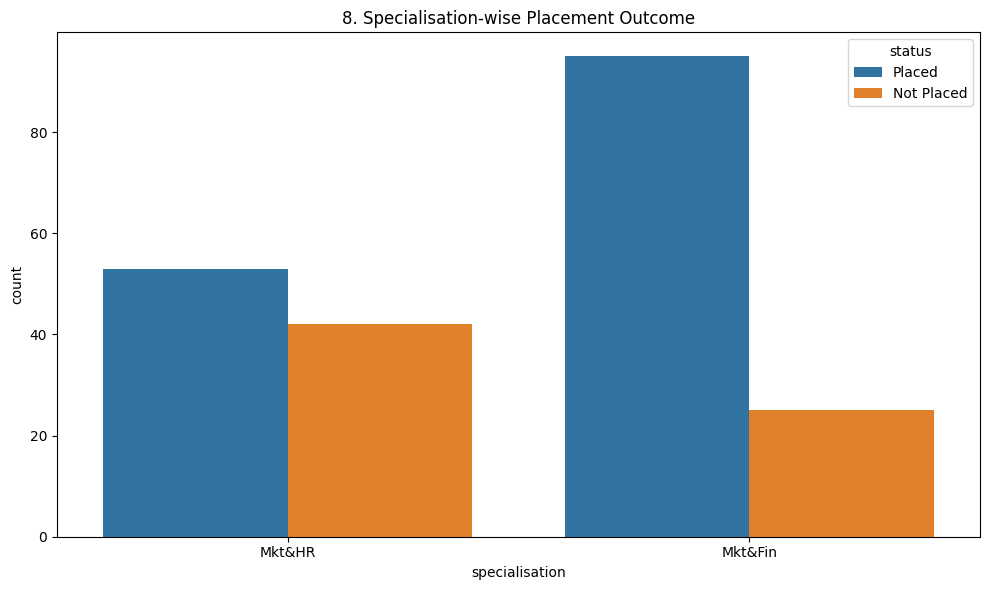

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="specialisation", hue="status")
plt.title(f'{plot_no}. Specialisation-wise Placement Outcome')
show_fig()
plot_no += 1

C:\Users\MAYANI\AppData\Local\Temp\ipykernel_9080\519624739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="company_tier", y="interview_score", palette="Spectral")


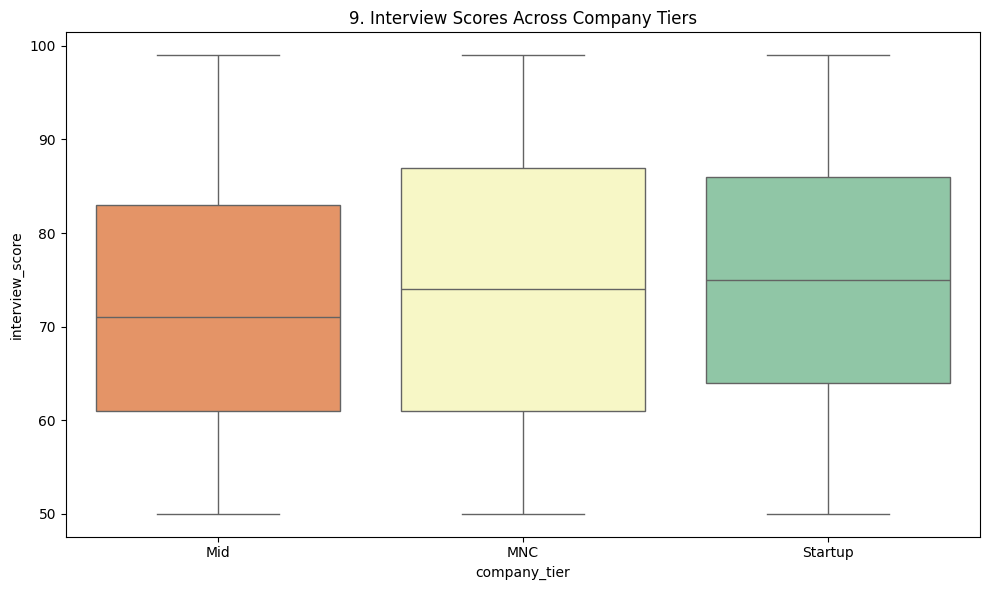

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="company_tier", y="interview_score", palette="Spectral")
plt.title(f'{plot_no}. Interview Scores Across Company Tiers')
show_fig()
plot_no += 1

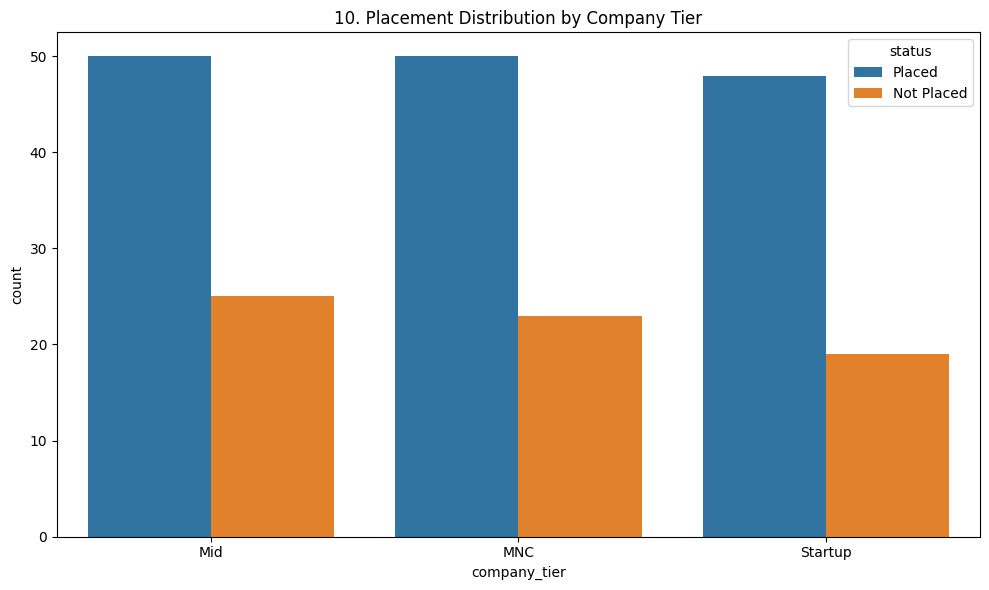

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="company_tier", hue="status")
plt.title(f'{plot_no}. Placement Distribution by Company Tier')
show_fig()
plot_no += 1

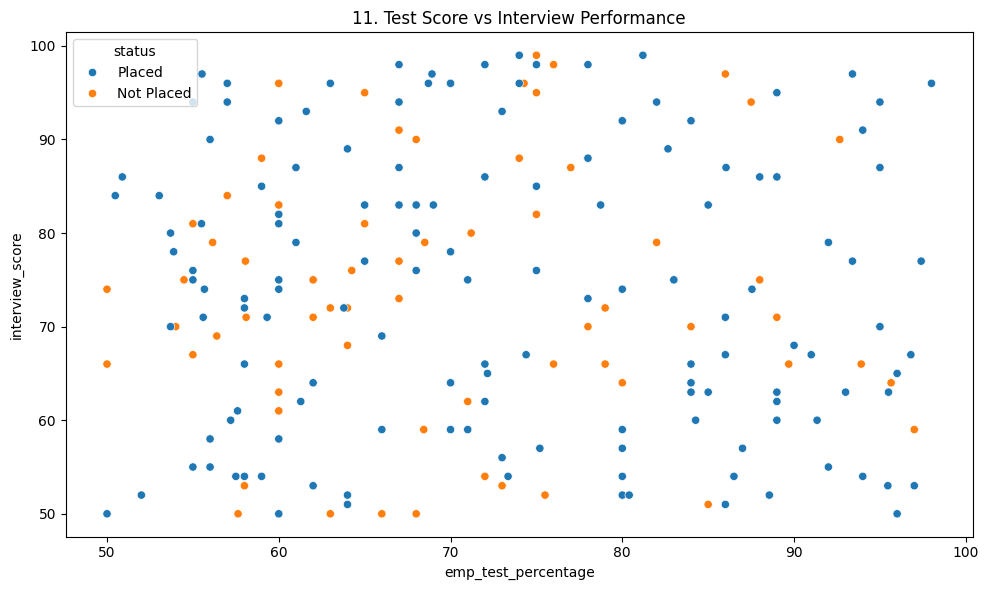

In [25]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="emp_test_percentage", y="interview_score", hue="status")
plt.title(f'{plot_no}. Test Score vs Interview Performance')
show_fig()
plot_no += 1

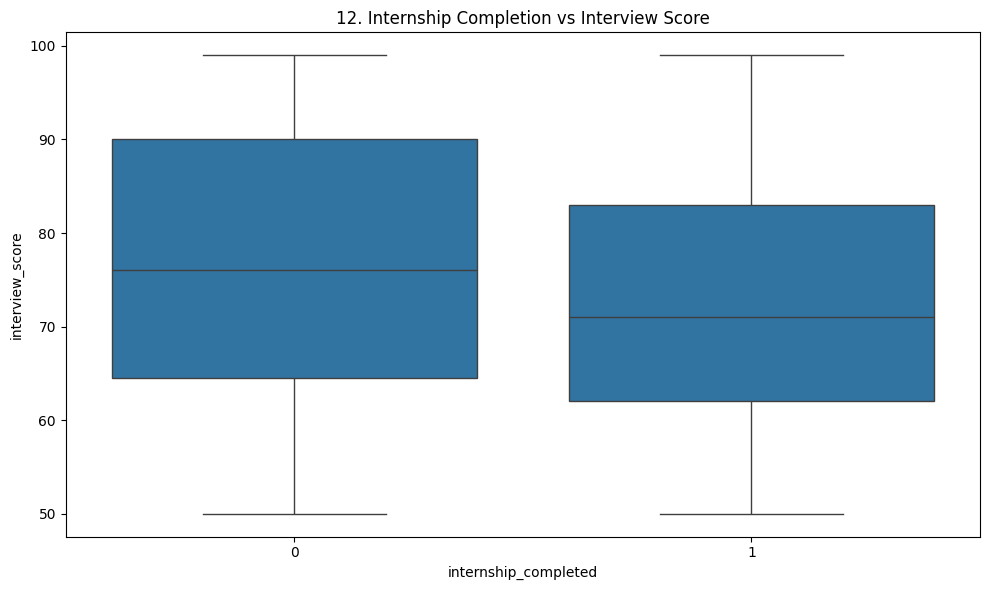

In [26]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="internship_completed", y="interview_score")
plt.title(f'{plot_no}. Internship Completion vs Interview Score')
show_fig()
plot_no += 1

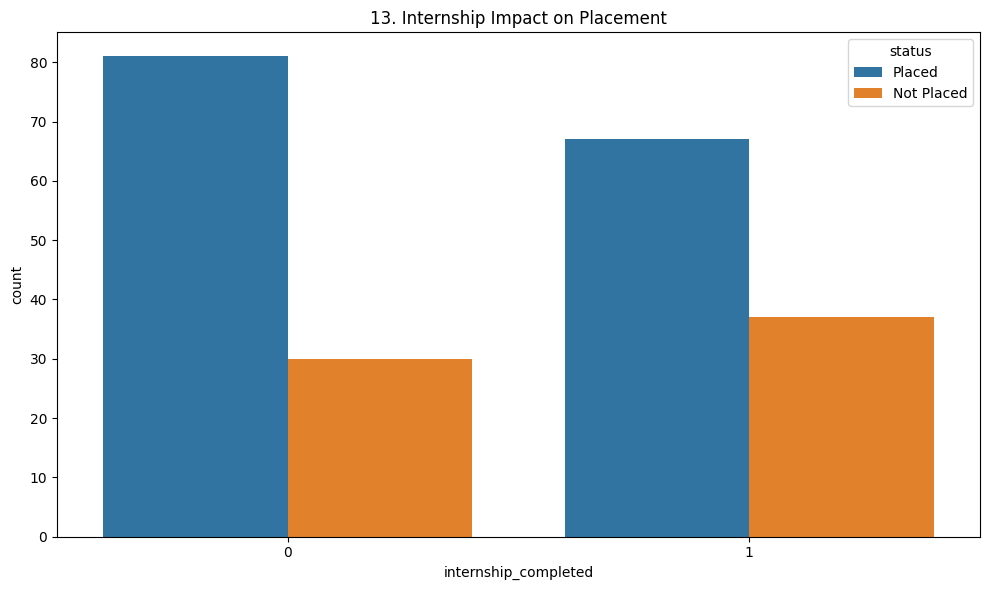

In [27]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="internship_completed", hue="status")
plt.title(f'{plot_no}. Internship Impact on Placement')
show_fig()
plot_no += 1

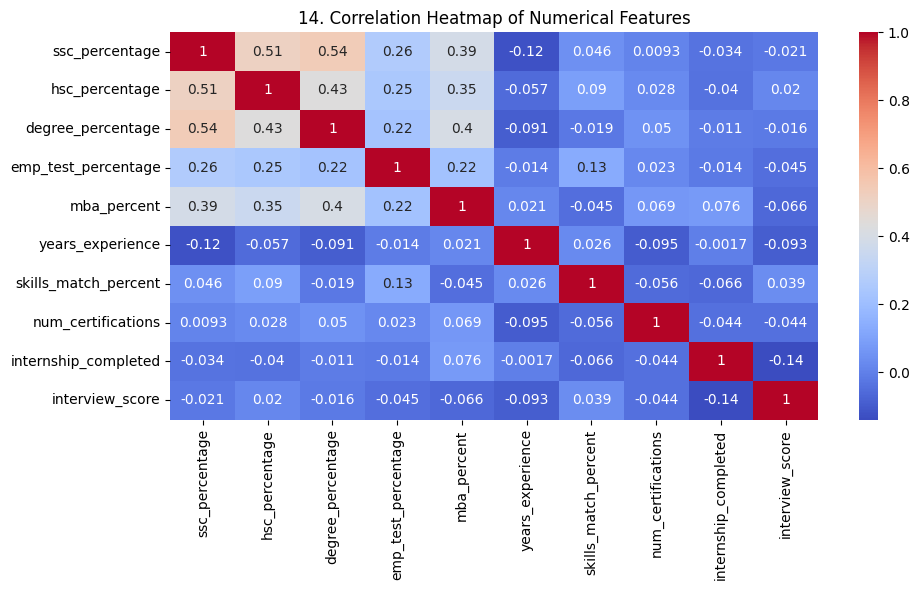

In [28]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), cmap="coolwarm", annot=True)
plt.title(f'{plot_no}. Correlation Heatmap of Numerical Features')
show_fig()
plot_no += 1

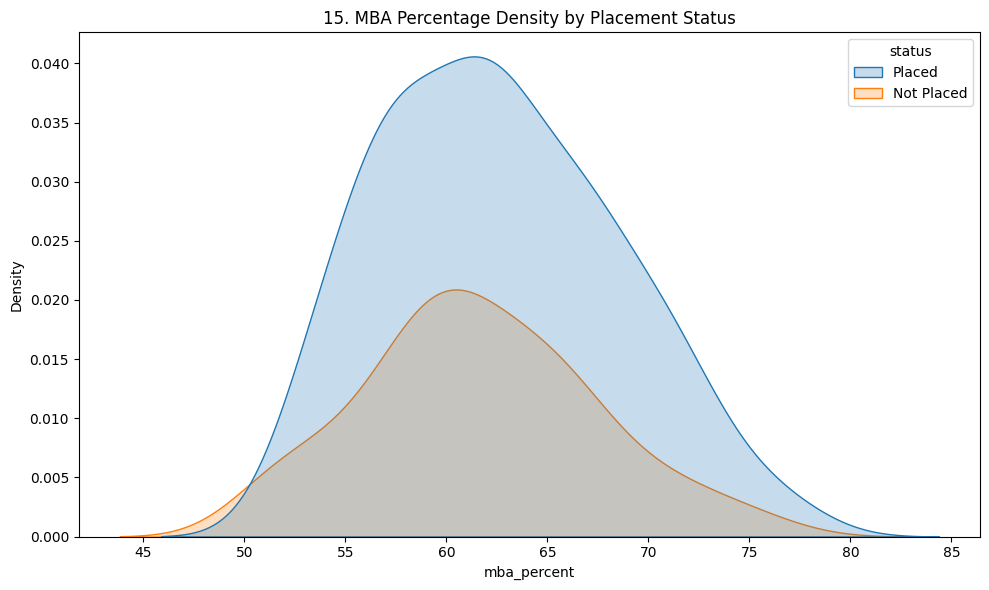

In [29]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="mba_percent", hue="status", fill=True)
plt.title(f'{plot_no}. MBA Percentage Density by Placement Status')
show_fig()
plot_no += 1

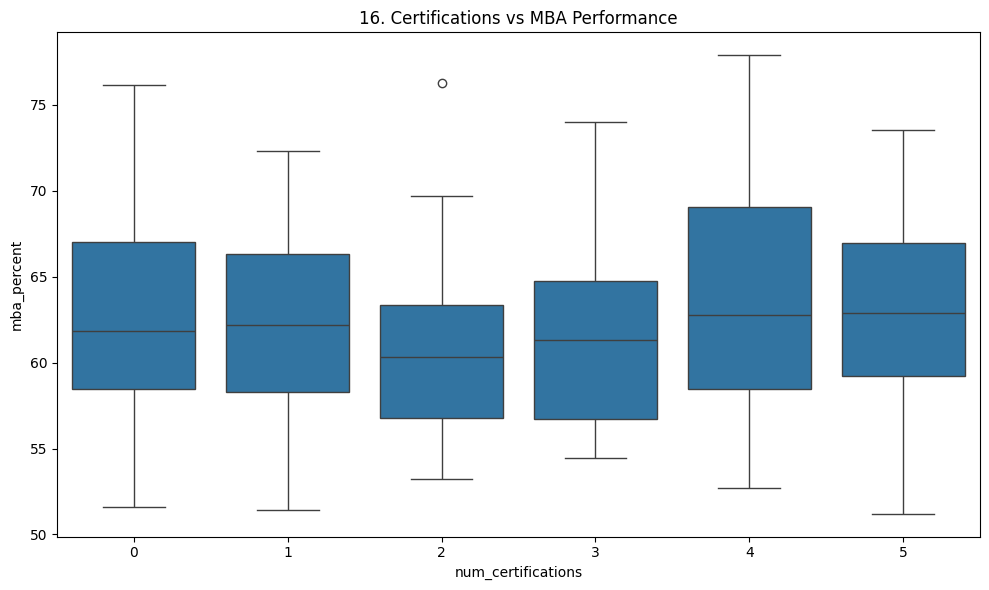

In [30]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="num_certifications", y="mba_percent")
plt.title(f'{plot_no}. Certifications vs MBA Performance')
show_fig()
plot_no += 1

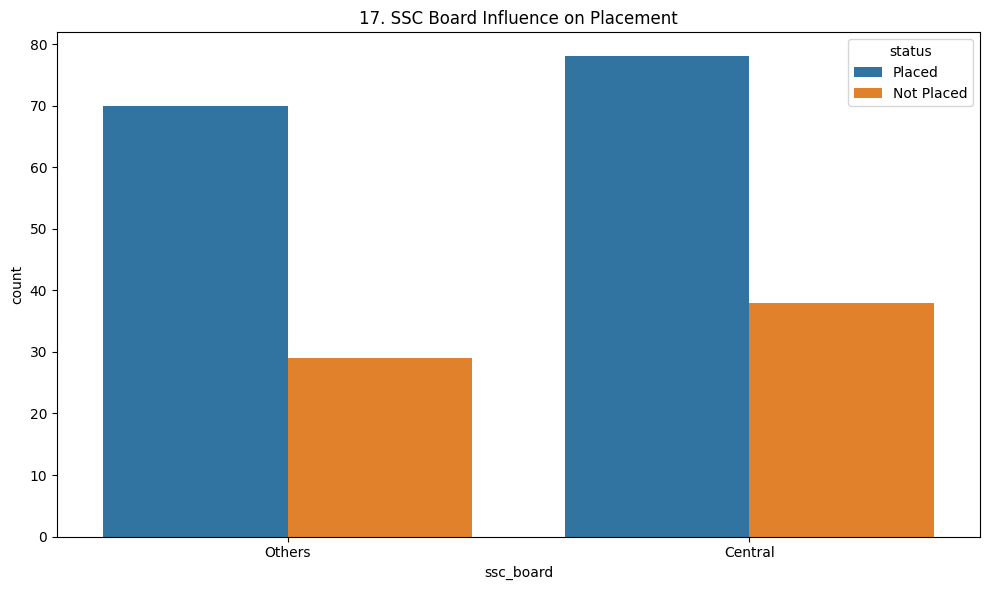

In [31]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="ssc_board", hue="status")
plt.title(f'{plot_no}. SSC Board Influence on Placement')
show_fig()
plot_no += 1

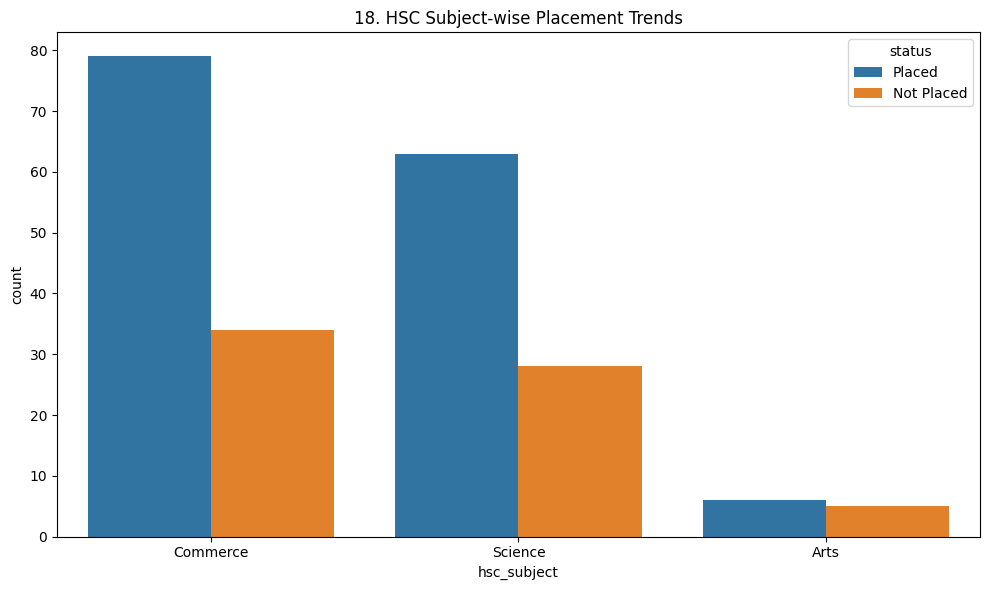

In [32]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="hsc_subject", hue="status")
plt.title(f'{plot_no}. HSC Subject-wise Placement Trends')
show_fig()
plot_no += 1

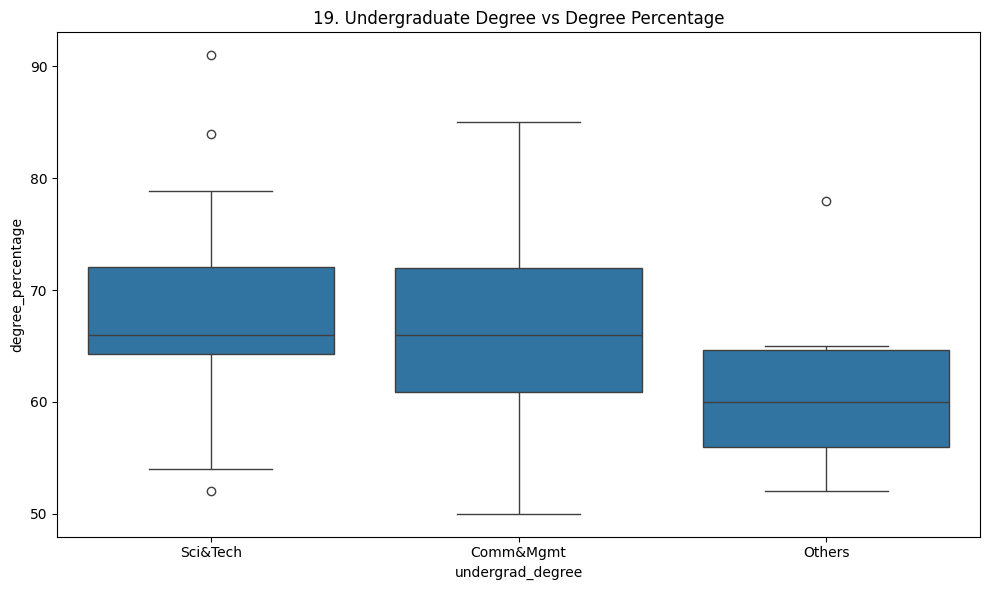

In [33]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="undergrad_degree", y="degree_percentage")
plt.title(f'{plot_no}. Undergraduate Degree vs Degree Percentage')
show_fig()
plot_no += 1

C:\Users\MAYANI\AppData\Local\Temp\ipykernel_9080\1816543652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="status", y="skills_match_percent", palette="Pastel1")


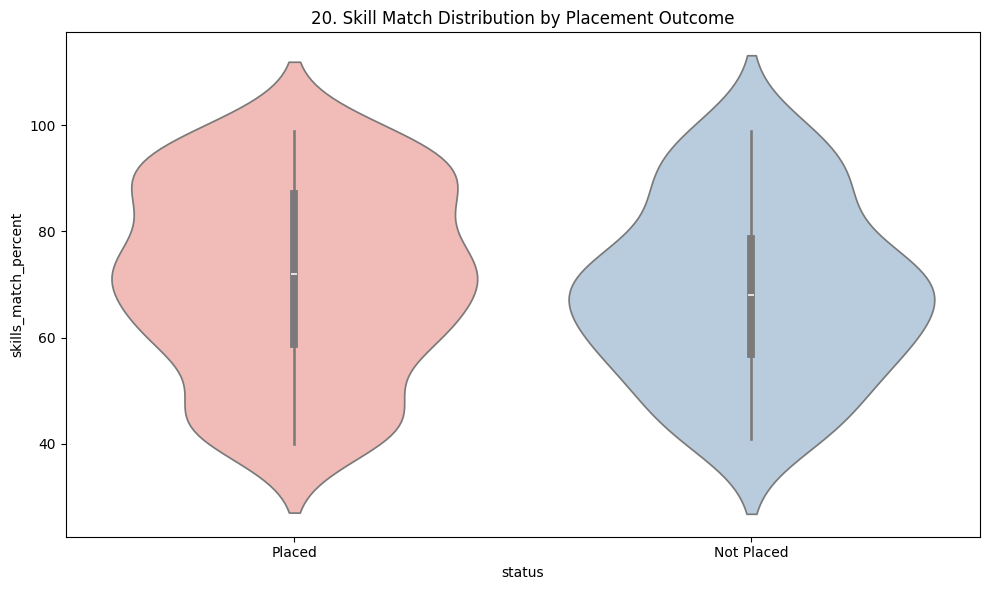

In [34]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="status", y="skills_match_percent", palette="Pastel1")
plt.title(f'{plot_no}. Skill Match Distribution by Placement Outcome')
show_fig()
plot_no += 1

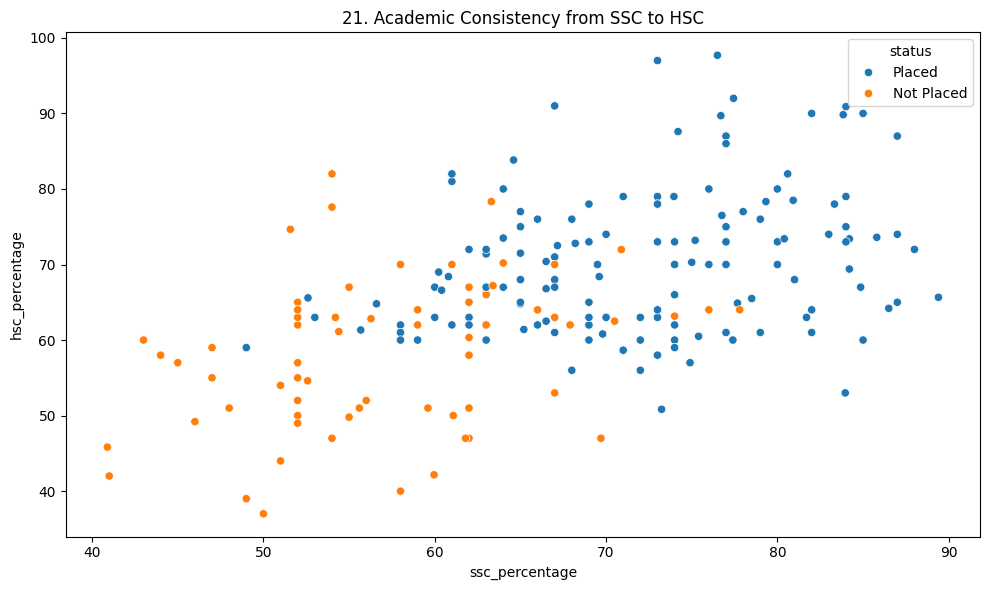

In [35]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="ssc_percentage", y="hsc_percentage", hue="status")
plt.title(f'{plot_no}. Academic Consistency from SSC to HSC')
show_fig()
plot_no += 1

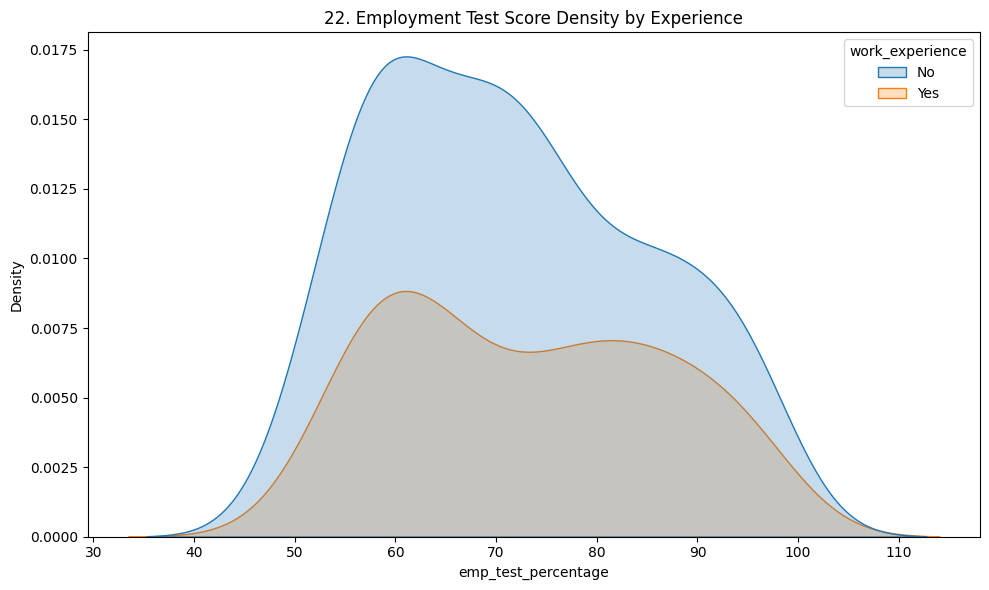

In [36]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="emp_test_percentage", hue="work_experience", fill=True)
plt.title(f'{plot_no}. Employment Test Score Density by Experience')
show_fig()
plot_no += 1

In [37]:
X = df.drop('status', axis=1)
y = df['status']

In [38]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [39]:
y_encoded = y.map({"Placed": 1, "Not Placed": 0})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [43]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8372093023255814
ROC-AUC: 0.9307692307692308

Classification Report:
               precision    recall  f1-score   support

  Not Placed       0.88      0.54      0.67        13
      Placed       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43


Confusion Matrix:
 [[ 7  6]
 [ 1 29]]


In [46]:
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

feature_importances.head(10)

ssc_percentage           0.237721
degree_percentage        0.194647
hsc_percentage           0.146901
mba_percent              0.081642
interview_score          0.048878
skills_match_percent     0.046745
emp_test_percentage      0.040489
work_experience_Yes      0.030632
num_certifications       0.026085
specialisation_Mkt&HR    0.025021
dtype: float64

In [47]:
placement_probability = pd.DataFrame({
    "Actual_Status": y_test.values,
    "Predicted_Placement_Probability": y_prob
})

placement_probability.head()

,Actual_Status,Predicted_Placement_Probability
0,Not Placed,0.714194
1,Placed,0.898086
2,Placed,0.809516
3,Not Placed,0.598237
4,Placed,0.870915


In [48]:
placement_prob = rf_model.predict_proba(X_test)[:, 1]

In [49]:
def risk_level(prob):
    if prob >= 0.75:
        return "High Chance"
    elif prob >= 0.45:
        return "Medium Chance"
    else:
        return "Low Chance"

In [50]:
risk_levels = pd.Series(placement_prob).apply(risk_level)


In [51]:
final_prediction = pd.DataFrame({
    "Actual_Status": y_test.map({1: "Placed", 0: "Not Placed"}).values,
    "Placement_Probability": placement_prob,
    "Risk_Level": risk_levels.values
})

In [52]:
final_prediction = final_prediction.sort_values(
    by="Placement_Probability",
    ascending=False
)

In [53]:
final_prediction.head(10)

,Actual_Status,Placement_Probability,Risk_Level
23,NaN,0.944056,High Chance
15,NaN,0.941663,High Chance
24,NaN,0.938955,High Chance
9,NaN,0.914122,High Chance
26,NaN,0.911563,High Chance
34,NaN,0.911119,High Chance
13,NaN,0.900885,High Chance
1,NaN,0.898086,High Chance
7,NaN,0.884132,High Chance
31,NaN,0.875704,High Chance
